## CSCN8040 - Case Study in Artificial Intelligence & Machine Learning

## Predictive Loan Risk Analyzer for Financial Institution

### Odeleye, Temitope Samuel
### Otokpa, Jeremiah Onah
### Yekini, Yakub


# 1. Framing the Problem - Describe the goal

VISION <br>
Why are you creating the product? <br>
To assist financial institutions in their risk analysis by assessing the probability that a customer will default on a payment before the bank gives a loan.

TARGET GROUP<br>
Who is your target customer ?<br>
- Banks that offer loans to consumers.
- Banks that offer loans to enterprises.
- Individuals want to assess their ability to repay or the possibility of a loan.
- Enterprises want to assess their ability to repay or the possibility of a loan.


NEEDS<br>
What problem does your product solve ?<br>
Decrease the percentage default on payment of  loans. 

PRODUCT<br>
What makes your product stand out?<br>
By using Machine Learning algorithms more specifically a supervised learning approach, we will be able to determine with more accuracy for which customers the banks should offer loans with less risk. 

BUSINESS<br>
How will the product benefit the company?<br>
By offering more loans, with fewer risks, the banks will be able to increase their revenue and profits. 





# 2. Getting the Data

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [68]:
loan_data = pd.read_csv("./assets/loan_approval_dataset.csv")
loan_data.head()

loan_id   no_of_dependents      education  self_employed   income_annum   
0        1                  2       Graduate             No        9600000  \
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value   
0      29900000          12           778                    2400000  \
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value   
0                  17600000              22700000            8000000  \
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [69]:
print(loan_data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


Here are what the columns represent:<br>
- loan_id: The unique identification number of each sample.
- no_of_dependents: Number of Dependents of the Applicant
- education: Education of the Applicant (Graduate/Not Graduate)
- self_employed: Either if the applicant is self employed or not.
- income_annum: Annual Income of the Applicant
- loan_amount: The total amount requested for the loan.
- loan_term: The duration, in years, within which the loan must be repaid.
- cibil_score: Credit Score
- residential_assets_value: The total value of the applicant's residential assets.
- commercial_assets_value: The total value of the applicant's commercial assets.
- luxury_assets_value: 	The total value of the applicant's luxury assets.
- bank_asset_value:  The total value of the applicant's bank assets.
- loan_status:Target variable. Loan Approval Status (Approved/Rejected)


# 3. Exploratory Data Analysis (EDA):


## 3.1. Explore statistics (e.g. using Pandas describe function)

In [70]:
loan_data.describe()

loan_id   no_of_dependents   income_annum   loan_amount   
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03  \
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value   
count  4269.000000   4269.000000               4.269000e+03  \
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

## 3.2. Plotting histograms for each column in the dataframe side by side

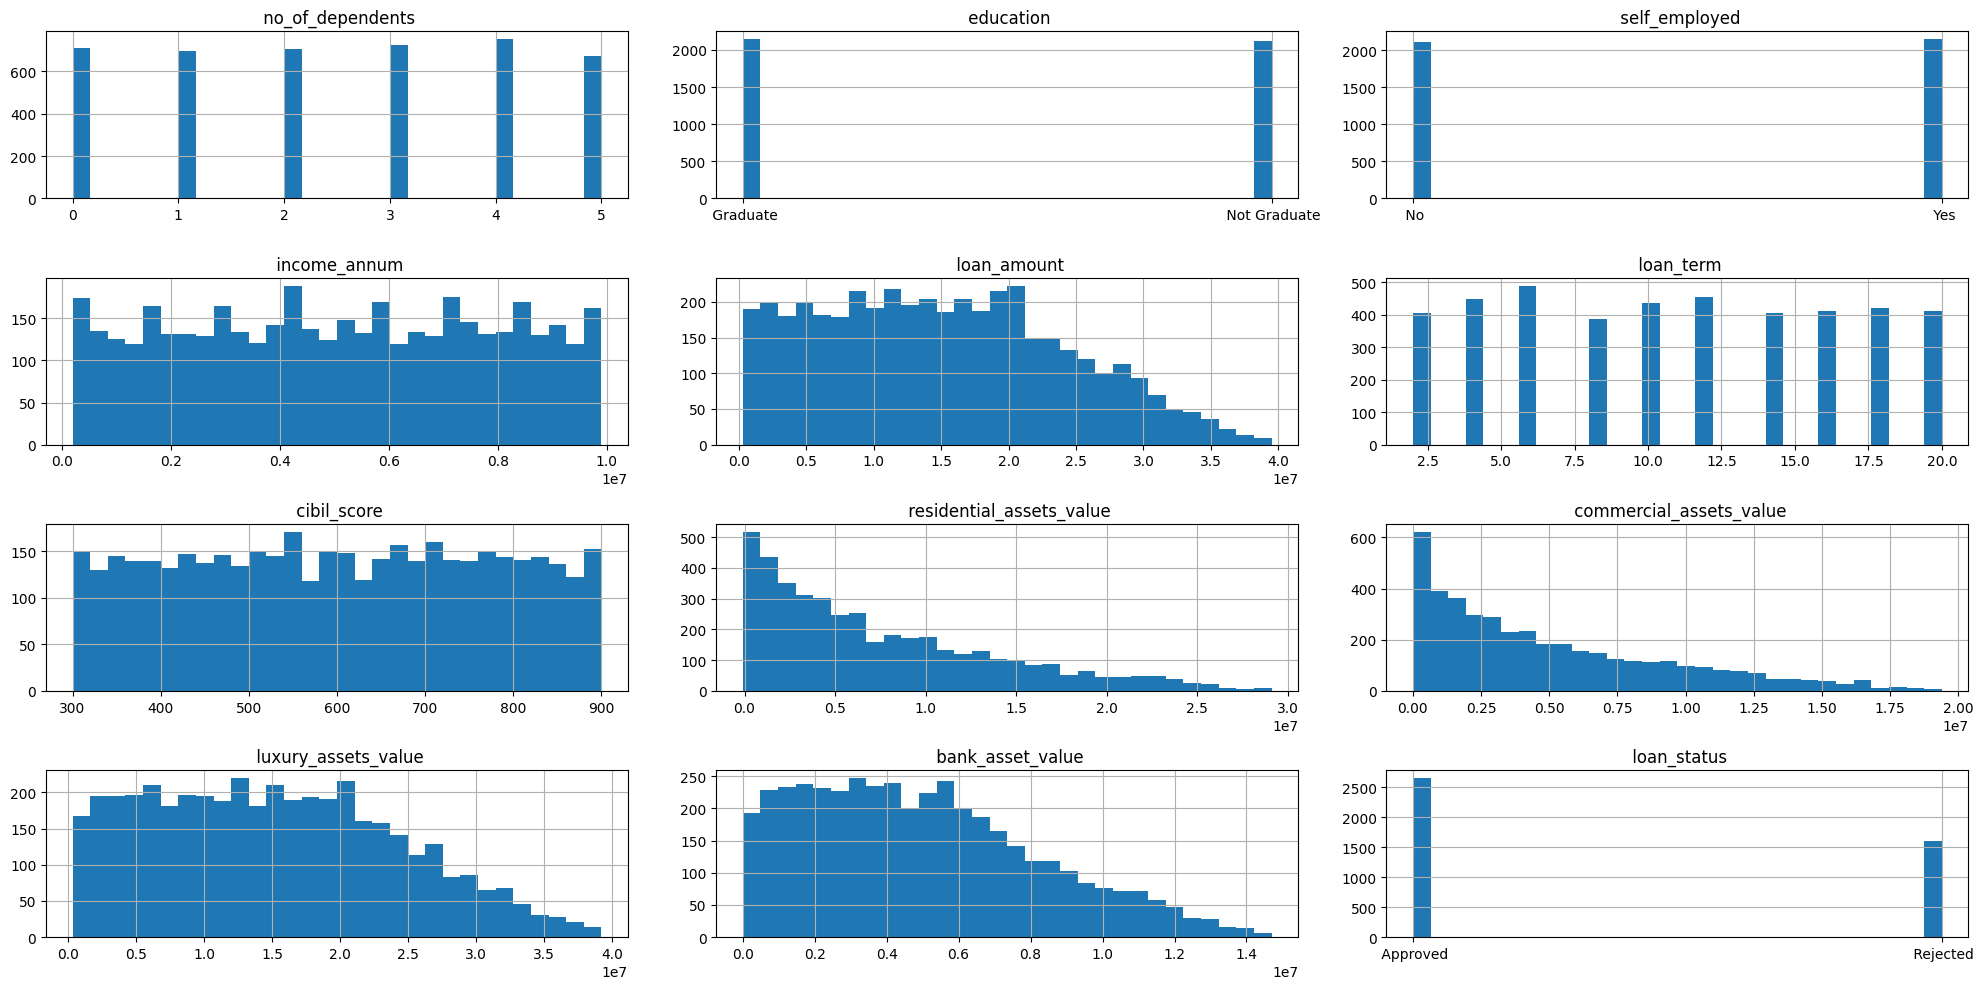

In [71]:
import matplotlib.pyplot as plt

# Assuming 'loan_train' is your DataFrame
# Drop the first column
loan_data = loan_data.drop(loan_data.columns[0], axis=1)

columns = loan_data.columns

plt.figure(figsize=(20, 10))  # Adjusting the figure size 

# Loop and subplot grid based on the new number of columns
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # the grid size 
    loan_data[column].hist(bins=30)  # Adjusting the number of bins as needed
    plt.title(column)

plt.tight_layout()
plt.show()


## 3.3. Creating the Correlation Matrix using Pandas --> df.corr()

The correlation matrix heatmap graph assists in identifying relationships between variables. 

In [72]:
# Select only numeric columns for correlation calculation
numeric_columns = loan_data.select_dtypes(include=[float, int])

# Compute the correlation matrix for the selected numeric columns
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                            no_of_dependents   income_annum   loan_amount   
 no_of_dependents                   1.000000       0.007266     -0.003366  \
 income_annum                       0.007266       1.000000      0.927470   
 loan_amount                       -0.003366       0.927470      1.000000   
 loan_term                         -0.020111       0.011488      0.008437   
 cibil_score                       -0.009998      -0.023034     -0.017035   
 residential_assets_value           0.007376       0.636841      0.594596   
 commercial_assets_value           -0.001531       0.640328      0.603188   
 luxury_assets_value                0.002817       0.929145      0.860914   
 bank_asset_value                   0.011163       0.851093      0.788122   

                            loan_term   cibil_score   
 no_of_dependents           -0.020111     -0.009998  \
 income_annum                0.011488     -0.023034   
 loan_amount                 0.008437     -0.017035   
 loan_ter

### 3.3.1. Get a Visual Representation of the v using Seaborn

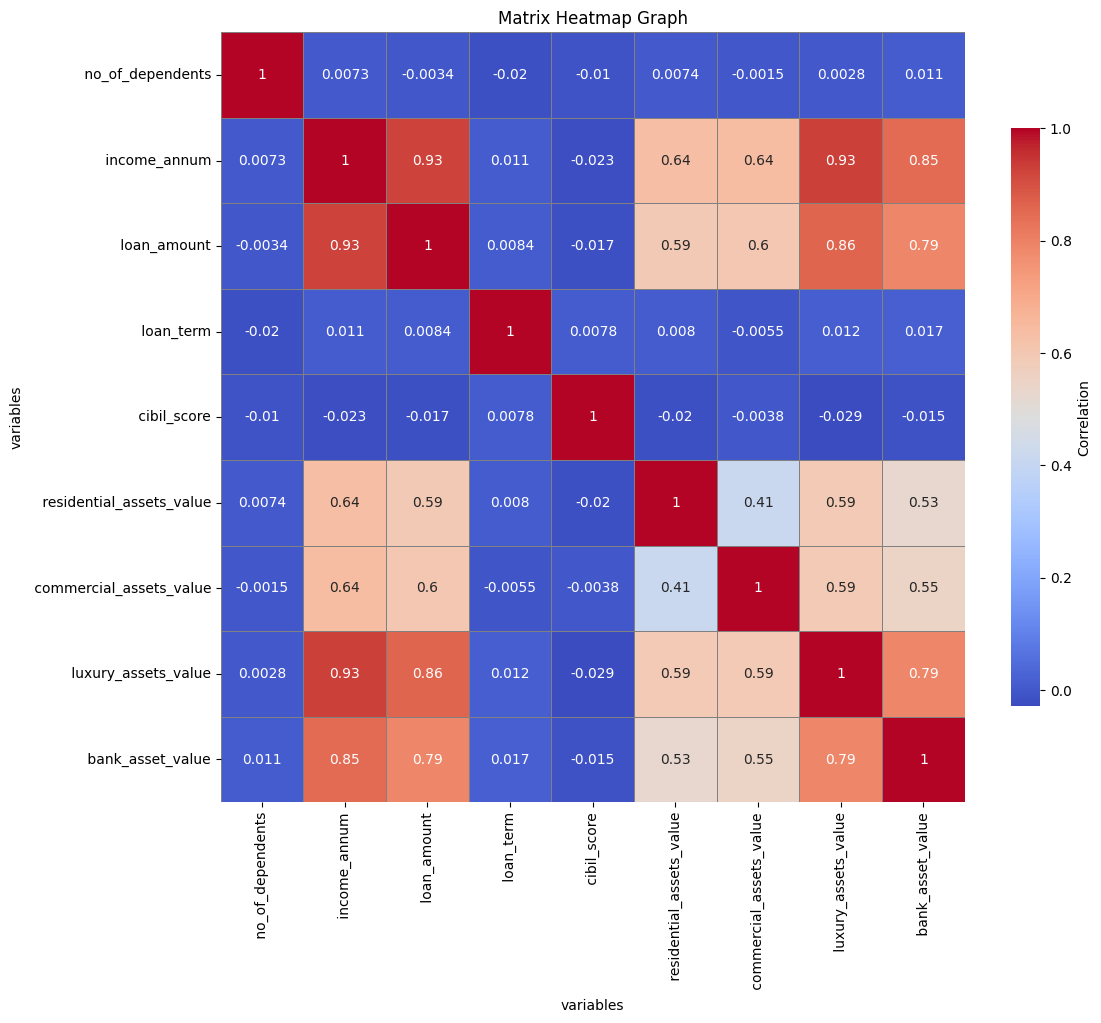

In [73]:
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            annot_kws={"size": 10},  
            linewidths=0.5, linecolor='gray',  
            cbar_kws={"shrink": 0.75, "label": 'Correlation'}) 
plt.title('Matrix Heatmap Graph')
plt.xlabel('variables')
plt.ylabel('variables')
plt.show()


The diagonal line of 1s represents the correlation of each variable with itself, which is always perfect showing a value of 1.<br>

-Income and LoanAmount: There's a higher positive correlation (0.93), suggesting that higher applicant income might be associated with larger loan amounts requested.<br>

- commercial_assets_value and loan_term: A weaker positive correlation (-0.0055) indicates that higher commercial_assets_value might slightly increase the loan_term.<br>

- cibil_score: It has very low correlation coefficients with other variables, suggesting it doesn't have a strong linear relationship with numerical features like income or loan amount in this dataset.

### 3.3.2. Graph to see the correlation as shown in the Correlation Matrix 

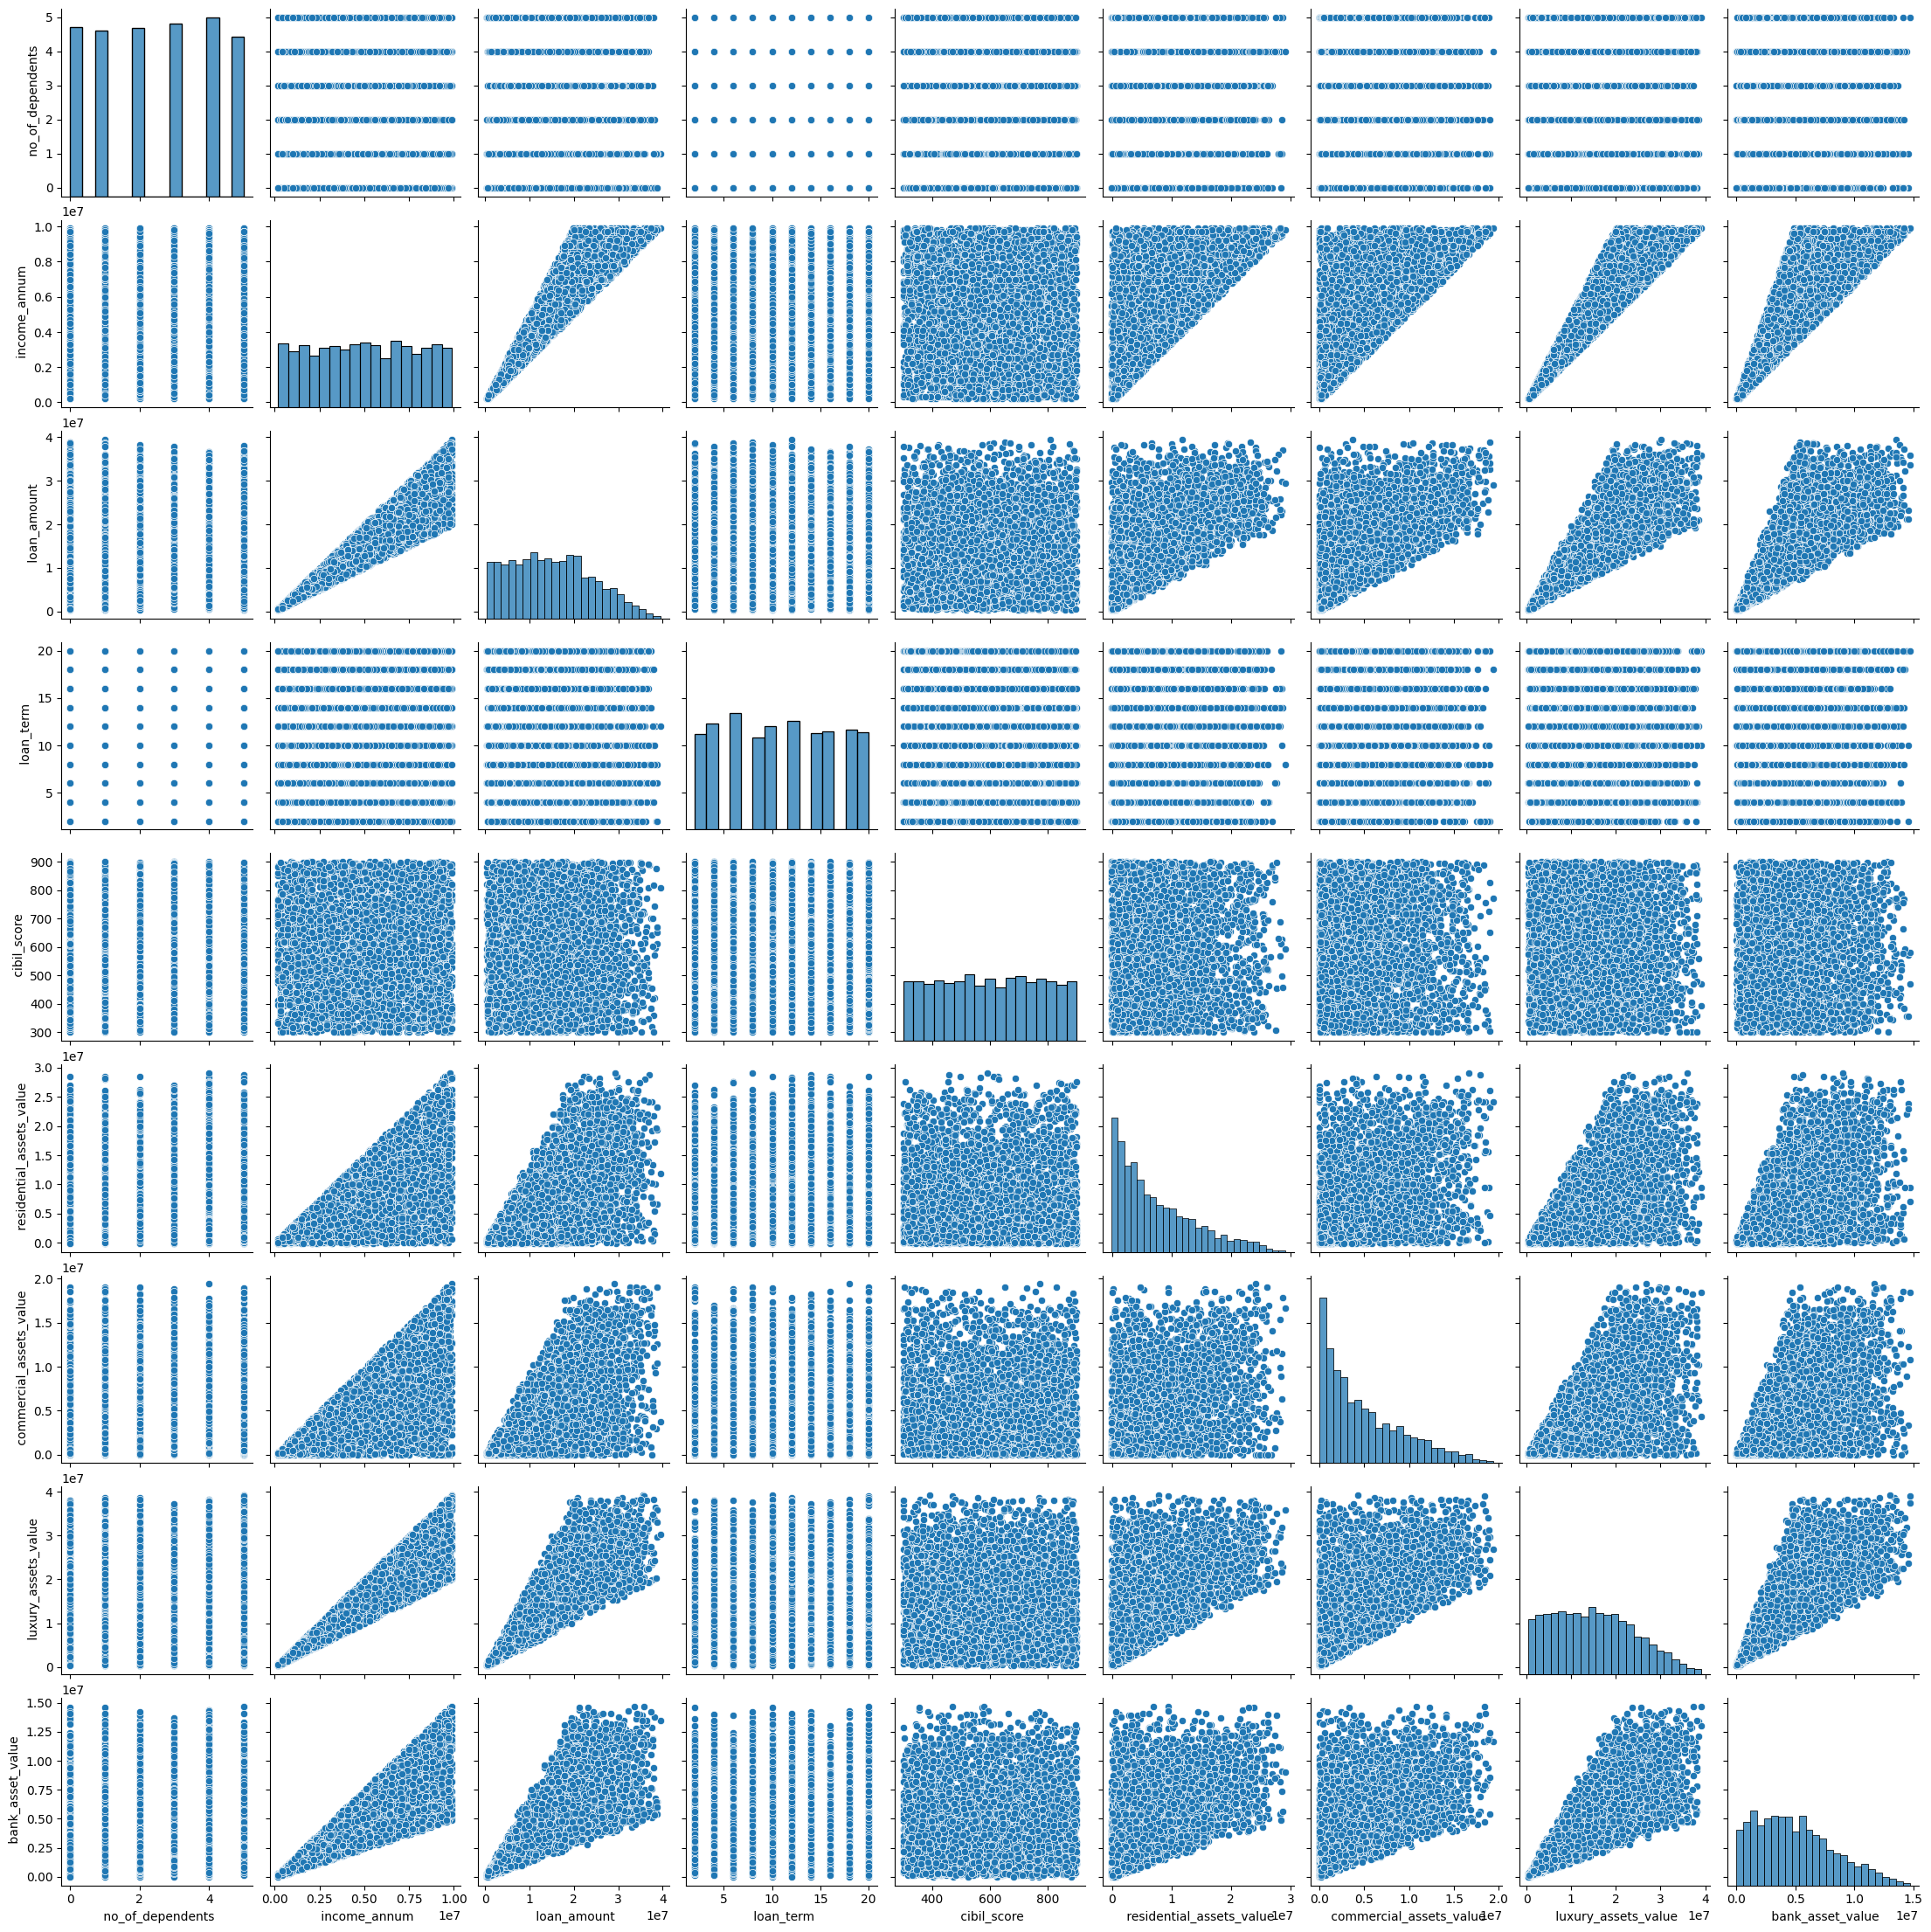

In [74]:
sns.pairplot(loan_data)

As we saw in the Correlation Matrix can also see, some variables have a positive correlation with other variables, for example, loan_amount & income_annum, luxury_assets_value & bank_asset_value, income_annum & luxury_assets_value. 

## 3.4. Plot: cibil_score vs. LoanAmount

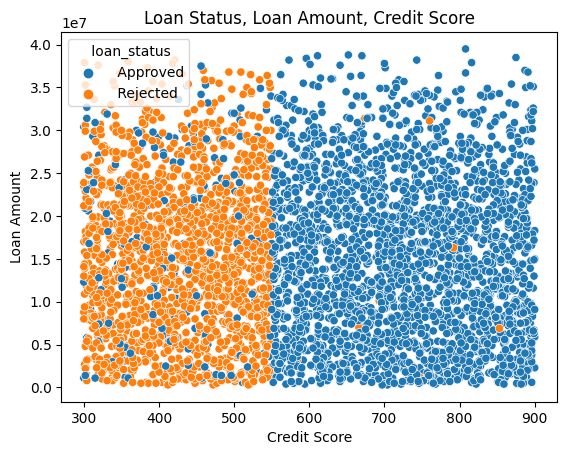

In [75]:
sns.scatterplot(x=loan_data[' cibil_score'], y= loan_data[' loan_amount'], hue=loan_data[' loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()


It is amazed to see the credit scores around 540 - 550 separate the loan status into two parts in a very clear way. In the other words, the loan status is highly related to the credit score.

## 3.5. Plot Loan status and loan amount

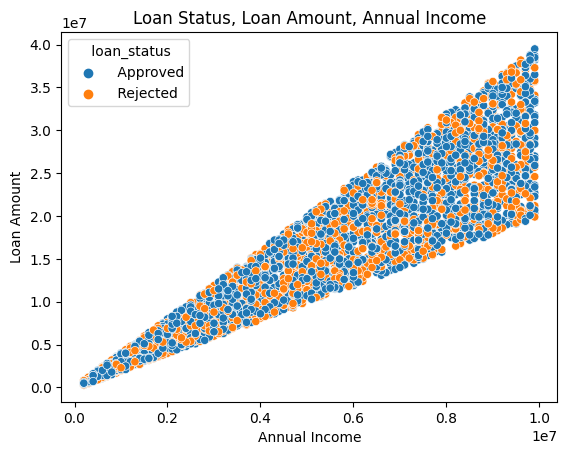

In [76]:
sns.scatterplot(x=loan_data[' income_annum'], y= loan_data[' loan_amount'], hue=loan_data[' loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

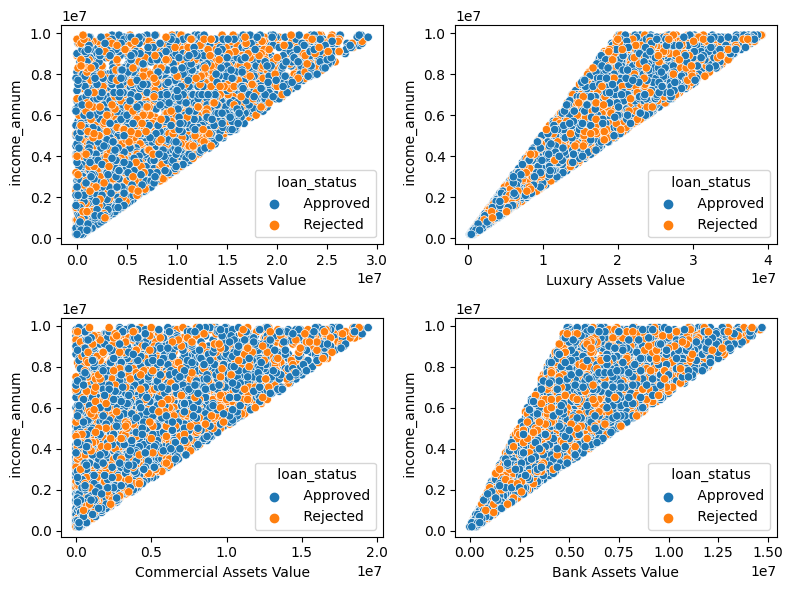

In [77]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(loan_data, x = ' residential_assets_value', y= ' income_annum', hue = ' loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(loan_data, x = ' commercial_assets_value', y= ' income_annum', hue = ' loan_status',ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")

sns.scatterplot(loan_data, x = ' luxury_assets_value', y= ' income_annum', hue = ' loan_status',ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")

sns.scatterplot(loan_data, x = ' bank_asset_value', y= ' income_annum', hue = ' loan_status',ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()

Let's take a more look about the asset values through the scatterplot 

-  We can see, both of residential_assets_value, commercial_assets_value create right triangles on the scatter plots, cutting the plot into two sections. This indicates that the relationship between annual income and these asset values might have some sort of threshold effect. For example, once the asset value reaches a certain point, the annual income tends to increase significantly.
- The obtuse triangles you're seeing for luxury_assets_value, bank_asset_value suggest have a different type of relationship. The smaller triangle for luxury assets value compared to bank asset value might indicate that while there's a strong correlation between luxury assets value and annual income, there's a higher variability in annual income for any given luxury assets value. In other words, luxury assets might be a good indicator of higher annual income, but there are exceptions.

# 4. Preparing the environment to build our machine learning models.

##  4.1. Converting categorical variable(s) into dummy/indicator variables

The `pd.get_dummies()` function in pandas is used for converting categorical variable(s) into dummy/indicator variables, also known as one-hot encoding. 

In [78]:
loan_dummies = pd.get_dummies(loan_data)

In [79]:
loan_dummies.rename(columns = {' education_ Graduate':' education', ' self_employed_ Yes':' self_employed', ' loan_status_ Approved':' loan_status' }, inplace = True)

loan_dummies = loan_dummies.drop([' education_ Not Graduate', ' self_employed_ No', ' loan_status_ Rejected'], axis=1)


In [80]:
print(loan_dummies.columns)


Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education',
       ' self_employed', ' loan_status'],
      dtype='object')


##  4.2. Splitting the data: training, validation, and test sets

In [81]:
from sklearn.model_selection import train_test_split

y = loan_dummies[' loan_status']
X = loan_dummies.drop([' loan_status'], axis=1)

# Splitting the data into training and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further splitting the temporary training set into actual training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the shapes of the splits
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((1494, 11), (1494,), (1494, 11), (1494,), (1281, 11), (1281,))

We split the original dataset into training (70%),  test set (15%) and validation (15%).

 ##  4.3. Standardizing the feature sets (training, validation, and test)

Standardization: It transforms the features to have a mean of zero and a standard deviation of one. This process, known as standardization, is crucial for many machine learning algorithms to perform well, especially those that are sensitive to the scale of input features, such as Support Vector Machines (SVMs), logistic regression, and neural networks.

In [82]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()
stand_scaler.fit(X_train)

# Transform the datasets
X_train_stand = stand_scaler.transform(X_train)
X_val_stand = stand_scaler.transform(X_val)
X_test_stand = stand_scaler.transform(X_test)


In [83]:
X_train_stand[0]

array([ 1.54780671, -0.97361887, -0.93217608,  1.56085479,  0.71507842,
       -0.87735457, -1.04262389, -0.7151781 , -0.81214309,  0.96061435,
        0.9593271 ])

## 5. Building our machine learning models

## 5.1. Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

# Fitting the logistic regression model
clf = LogisticRegression(random_state=66).fit(X_train_stand, y_train)

# Extracting coefficients and the intercept
coefficients = clf.coef_[0]
intercept = clf.intercept_

# Preparing a summary of variables and their coefficients
variables = list(X_train.columns)
clf_summary = [["Variables", "Coefficient"]]
for var, coef in zip(variables, coefficients):
    clf_summary.append([var, coef])
clf_summary.append(["Intercept", intercept[0]])

# Printing the summary without tabulate
print(f"{'Variables':<30} {'Coefficient'}")
for row in clf_summary[1:]:  # Skipping the header row for formatting
    print(f"{row[0]:<30} {row[1]:.4f}")


Variables                      Coefficient
 no_of_dependents              -0.0412
 income_annum                  -1.3273
 loan_amount                   0.9627
 loan_term                     -0.8134
 cibil_score                   4.0735
 residential_assets_value      0.0868
 commercial_assets_value       0.0157
 luxury_assets_value           0.2609
 bank_asset_value              0.2119
 education                     0.0933
 self_employed                 -0.0894
Intercept                      1.5598


In [85]:
y_lr = clf.predict(X_val_stand) 

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# And then print the metrics
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_lr))
print('Precision:', '%.3f' % precision_score(y_val, y_lr, zero_division=0))
print('Recall:', '%.3f' % recall_score(y_val, y_lr))
print('F1 Score:', '%.3f' % f1_score(y_val, y_lr))




Accuracy: 0.916
Precision: 0.938
Recall: 0.927
F1 Score: 0.933


## 5.2. Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_forest = random_search.best_estimator_

best_params, best_forest


({'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_depth': 10},
 RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50))

In [88]:
import pickle

rf_opt = RandomForestClassifier(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'], 
                                min_samples_leaf = best_params['min_samples_leaf'], min_samples_split = best_params['min_samples_split'])
rf_opt.fit(X_train, y_train)
y_rf = rf_opt.predict(X_val)


with open('./assets/model.pkl', 'wb') as f:
    pickle.dump(rf_opt, f)

In [89]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_rf))
print('Precision:', '%.3f' % precision_score(y_val, y_rf))
print('Recall:', '%.3f' % recall_score(y_val, y_rf))
print('F1 Score:', '%.3f' % f1_score(y_val, y_rf))

Accuracy: 0.968
Precision: 0.974
Recall: 0.974
F1 Score: 0.974


In [90]:
y_test_rf = rf_opt.predict(X_test)

print('Accuracy:', '%.3f' % accuracy_score(y_test, y_test_rf))
print('Precision:', '%.3f' % precision_score(y_test, y_test_rf))
print('Recall:', '%.3f' % recall_score(y_test, y_test_rf))
print('F1 Score:', '%.3f' % f1_score(y_test, y_test_rf))

Accuracy: 0.963
Precision: 0.968
Recall: 0.974
F1 Score: 0.971


Accuracy: Both on the validation set and the test set, we have an accuracy of around 0.972 to 0.967. This suggests that our model is correctly classifying around 97.2% to 96.7% of instances in both datasets.

Precision: Precision measures how many of the predicted positive instances are actually positive. With a precision of around 0.973 and 0.967  in each set, it means that about 97.3% and 96.7% of the instances predicted as positive by our model are truly positive.

Recall: Recall, also known as sensitivity or true positive rate, indicates how many of the actual positive instances our model is capturing. 

F1 Score: The F1 score is the harmonic mean of precision and recall and provides a balanced view of a model's performance. With an F1 score of around 0.978 and 0.974 in both sets, it indicates that the model is achieving a balanced trade-off between precision and recall.

## 5.3. Overall performance measurement in our models

The Random Forest model performed better performance than the Logistic Regression Model.

The fact that these metrics are very consistent between the validation and test sets is a great sign. It suggests that the model is not overfitting to the validation set and that it's likely to perform similarly well on new, unseen data.
Overall, the Random Forest model seems to have achieved a solid and robust performance on both the validation and test sets, demonstrating its capability to make accurate predictions across different datasets.



### 5.3.1. Confusion matrix for Logistic Regression Model: 

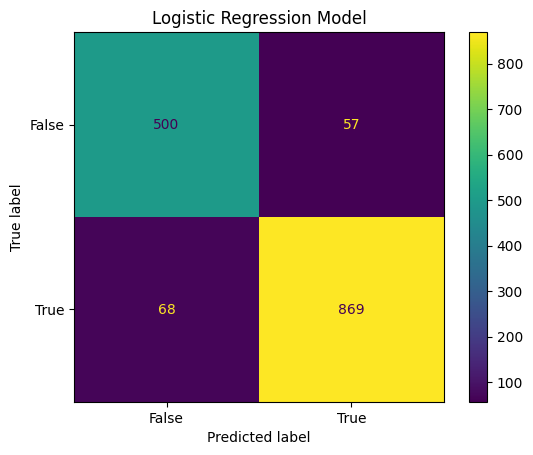

In [91]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Predicting the validation set results
y_pred = clf.predict(X_val_stand)

# Creating the confusion matrix
cm = metrics.confusion_matrix(y_val, y_pred)

# Assuming binary classification with classes 0 and 1
class_names = clf.classes_  # If your clf model has the .classes_ attribute

# Creating a display with labels
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Displaying the confusion matrix
disp.plot()
plt.title('Logistic Regression Model')  # Adding a title
plt.show()


Top Left : The model correctly predicted the negative class ("False") 500 times.
Top Right : The model incorrectly predicted the negative class as positive 57 times.
Bottom Left : The model incorrectly predicted the positive class as negative 68 times.
Bottom Right : The model correctly predicted the positive class ("True") 869 times.

So, the model failed 125 (68+57) out of 1494 times. **<span style="color:red">(8.5%)</span>**

### 5.3.2. Confusion matrix for Random Forest model (threshold default value of 0.5 ): 

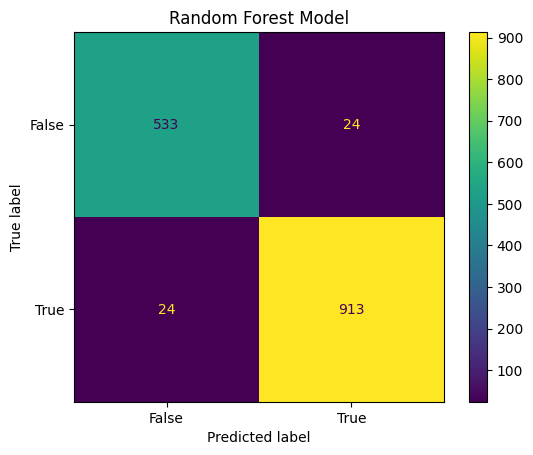

In [92]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming y_rf are your model predictions and rf_opt is your trained model
cm = metrics.confusion_matrix(y_val, y_rf, labels=rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_opt.classes_)

# Plotting the confusion matrix with the title
disp.plot()
plt.title('Random Forest Model')  # Set the title
plt.show()  # Display the plot with the title


The top left square (true negatives) shows that tThe model predicted 'False' and it was indeed 'False' for 531 times.
The bottom right square (true positives) indicates that 921 instances were correctly predicted as the positive class ("True").
The top right square (false positives) has 26 instances that were incorrectly predicted as the positive class ("True") when they were actually negative ("False").
The bottom left square (false negatives) has 16 instances that were incorrectly predicted as the negative class ("False") when they were actually positive ("True").


The model failed  48 (24+24) out of 1494 times. **<span style="color:red">(3.2%)</span>**

### 5.3.3. Confusion matrix for Random Forest model (threshold value of 0.6 ): 

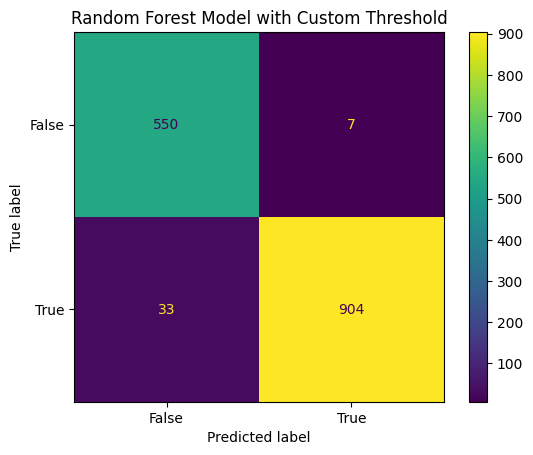

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Fit the RandomForestClassifier (assuming X_train and y_train are already defined)
rf = RandomForestClassifier(random_state=20)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class in the validation set
y_probs = rf.predict_proba(X_val)[:, 1]  # Get probabilities for the positive class

# Setting a threshold at 0.6
new_threshold = 0.6

# Apply the threshold to the probabilities to create new predictions
y_pred_with_new_threshold = (y_probs >= new_threshold).astype(int)

# Create a confusion matrix using these new predictions
cm = metrics.confusion_matrix(y_val, y_pred_with_new_threshold)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.title('Random Forest Model with Custom Threshold')
plt.show()


The model failed  40 (33+7) out of 1494 times. **<span style="color:red">(2.7%)</span>**

By raising the threshold to 0.6 means the model classifies fewer instances as "True" because it now requires a higher probability to be confident in a "True" prediction.

By increasing the threshold to 0.6, the model became more conservative about predicting 'True', which likely reduced the number of false positives (top right) 14 (it was 26 threshold default value of 0.5). but may increased the number of false negatives (bottom left) 26 (it was 16 threshold default value of 0.5). 

In [94]:
# Setting a threshold at 0.6
lowest_misclassification_cases = {'v': float('inf'), 'threshold': 0.3}
new_threshold = 0.55
while (new_threshold < 1):
    
    # Apply the threshold to the probabilities to create new predictions
    y_pred_with_new_threshold = (y_probs >= new_threshold).astype(int)

    # Create a confusion matrix using these new predictions
    cm_ = metrics.confusion_matrix(y_val, y_pred_with_new_threshold)
    
    v = cm_[0][1] + cm_[1][0]
    
    if lowest_misclassification_cases['v'] > v:
        lowest_misclassification_cases['v'] = v
        lowest_misclassification_cases['threshold'] = round(new_threshold, 2)
    new_threshold += 0.01
    
print(lowest_misclassification_cases)

print(f"{round(lowest_misclassification_cases['v']/1494 * 100, 1)}%")


{'v': 33, 'threshold': 0.57}
2.2%


## 7. A conclusion

<Axes: >

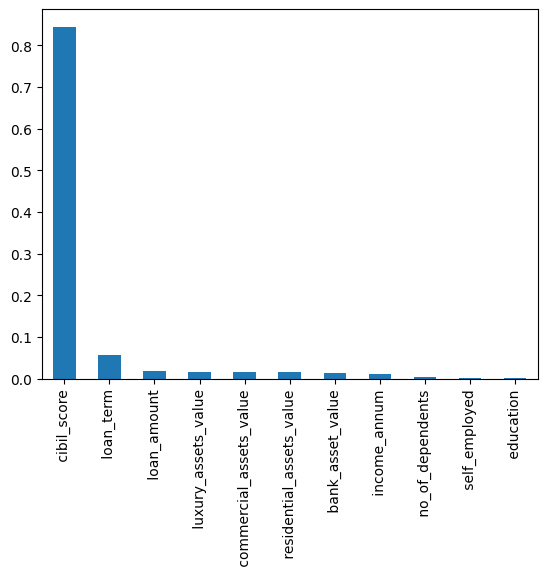

In [95]:
importances = rf_opt.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

# Sort the Series by importance in descending order
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_sorted.plot.bar(ax=ax)

The analysis highlights the significant influence of cibil_score, or credit scores, on the model's predictions, suggesting a strong relationship with the loan_status target variable. However, it emphasizes that correlation does not equal causation. Despite cibil_score's prominence in the model's decision-making, it's crucial to consider the model's identification of patterns and associations rather than direct causality. The analysis advises a comprehensive understanding of the model, acknowledging the role of other factors, feature interactions, and potential data noise. It underscores the importance of integrating these insights with domain knowledge for well-informed decision-making and strategy refinement.

Machine Learning model: We used Random Forest model, which has ability to handle non-linearity, interactions between variables, and potential outliers, correctly predicted approximately 97% ~ 98% loan applications. This model allowed us to identify the most influential features in predicting loan approvals and made predictive performance remain reliable across various scenarios. While the model performs well, there's always room for improvement by gathering more data, refine features, and fine-tune model parameters to enhance predictive accuracy further.